# Basic profiling of Datachallenge dataset.

## Intro: Import of dataset, sampling few thousand rows.

In [24]:
%matplotlib inline
import pandas as pd
import time
import numpy as np
import matplotlib

file_path = 'C:\GIT\Datachallenge\delays_dataset.csv'
file_opened = open(file_path,'r')
file_opened_binary = open(file_path,'rb')

#prints first 10 rows
df = pd.read_csv(file_opened, nrows =10)
print df
type(df)

  carrier  fltno dep_apt arr_apt sched_departure_date  scheduled_departure  \
0      7I    773     CUR     MAO           2016-04-29  2016-04-29 20:50:00   
1      AA   1361     PBI     PHL           2016-04-29  2016-04-29 15:55:00   
2      AA    137     DFW     HKG           2016-04-29  2016-04-29 07:50:00   
3      AA   4173     LGA     STL           2016-04-29  2016-04-29 17:10:00   
4      AA   5202     GNV     CLT           2016-04-29  2016-04-29 17:50:00   
5      AA   5633     PHX     TUS           2016-04-29  2016-04-29 17:20:00   
6      AA   6159     MIA     LHR           2016-04-29  2016-04-29 17:05:00   
7      AA   7163     LAX     NAN           2016-04-29  2016-04-29 23:30:00   
8      AA   8936     LAX     HKG           2016-04-29  2016-04-29 23:55:00   
9      AC     33     YVR     SYD           2016-04-29  2016-04-29 20:15:00   

      actual_departure  
0  2016-04-30 19:15:00  
1  2016-04-30 08:21:00  
2  2016-04-29 12:28:00  
3  2016-04-29 16:58:00  
4  2016-04-29 20

pandas.core.frame.DataFrame

## Counting of number of rows several ways:)

In [8]:
#count of lines  file opened for read, non-binary
print("#NONBINARY for i, line in enumerate(f, 1):")
t0 = time.time()
count = 0
with file_opened as f:
    for i, line in enumerate(f, 1):
        count += 1
print('Elapsed time : ', time.time() - t0)
print('count = ', count)
print('\n')
#Result:
# for i, line in enumerate(f, 1):
#('Elapsed time : ', 20.73099994659424)
#('count = ', 52624858)



#NONBINARY for i, line in enumerate(f, 1):
('Elapsed time : ', 22.76900005340576)
('count = ', 52624858)





#count of lines / file opened for read, binary
print("#BINARY for i, line in enumerate(f, 1):")
t0 = time.time()
count = 0
with file_opened_binary as f:
    for i, line in enumerate(f, 1):
        count += 1
print('Elapsed time : ', time.time() - t0)
print('count = ', count)
print('\n')

#Result:
#for i, line in enumerate(f, 1):
#('Elapsed time : ', 17.961999893188477)
#('count = ', 52628833)



#SUM count of lines / file opened for read, binary

t0 = time.time()
count = sum((1 for i in open(file_path, 'rb')))
print('Elapsed time : ', time.time() - t0)
print('count = ', count)
print('\n')

#('Elapsed time : ', 15.105999946594238)
#('count = ', 52628833)

In [9]:
#LVL note:
#code in cells above CLOSES the file!

#check if file is opened:
if file_opened.closed:
  print 'file is closed'
else:
  print 'file is opened'


file is closed


## Data profiling (basic)

Nacteni datasetu do dataframu pro pozdejsi zpracovani:

In [6]:
file_opened = open(file_path,'r')
fields_all = ['carrier',  'fltno', 'dep_apt', 'arr_apt', 'sched_departure_date',  'scheduled_departure',  'actual_departure']
fields_sched_departure_date = ['sched_departure_date']
fields_airports = ['dep_apt', 'arr_apt']
fields_carrier = ['carrier']
fields_flight_number = ['fltno']


pd_chunksize = 10 ** 6

t0 = time.time()
#df =   pd.read_csv(file_opened, nrows =10)
df_departure_date = pd.read_csv(file_opened,usecols = fields_sched_departure_date)
print('Elapsed time to read sched dep date: ', time.time() - t0)
t0 = time.time()


('Elapsed time to read sched dep date: ', 32.401999950408936)


In [ ]:

df_airports = pd.read_csv(file_opened,usecols = fields_airports)
print('Elapsed time to read airports: ', time.time() - t0)
t0 = time.time()

df_carrier = pd.read_csv(file_opened,usecols = fields_carrier)
print('Elapsed time to read carriers: ', time.time() - t0)
t0 = time.time()

df_flight_number = pd.read_csv(file_opened,usecols = fields_flight_number)
print('Elapsed time to read flight number: ', time.time() - t0)
t0 = time.time()

#df_1 = pd.read_csv(file_opened, chunksize=pd_chunksize)
type(df_1)
#print df_1

Min max datumy

In [11]:
file_opened = open(file_path,'r')
fields_airports = ['dep_apt', 'arr_apt']

t0 = time.time()

df_airports = pd.read_csv(file_opened,usecols = fields_airports)
print('Elapsed time to read airports: ', time.time() - t0)
t0 = time.time()
df_airports.shape

('Elapsed time to read airports: ', 37.63199996948242)


(52628832, 2)

In [13]:
unique_arr_airports = np.sort(df_airports.arr_apt.unique())
unique_dep_airports = np.sort(df_airports.dep_apt.unique())

In [ ]:
df_airports[['arr_apt','dep_apt']].sort()

In [14]:
# print all airport codes
#for airport in unique_airports: print airport

print unique_arr_airports
print np.count_nonzero(unique_arr_airports) #2878
print unique_dep_airports
print np.count_nonzero(unique_dep_airports) #2995

['AAE' 'AAL' 'AAN' ..., 'ZYL' 'ZYN' 'ZYR']
2878
['AAE' 'AAL' 'AAN' ..., 'ZYL' 'ZYN' 'ZYR']
2995


In [17]:
#max_datum = max(pd_file_read.)

#type(df_1.min)
print('Min departure date in dataset is: '+ df_departure_date.min() + '. \n')
print('Max departure date in dataset is: '+ df_departure_date.max() + '. \n')


sched_departure_date    Min departure date in dataset is: 2016-04-29. \n
dtype: object
sched_departure_date    Max departure date in dataset is: 2016-09-21. \n
dtype: object


In [21]:
df_departure_date_grouped = df_departure_date.groupby('sched_departure_date')

In [31]:
df_departure_date_sorted = df_departure_date['sched_departure_date'].value_counts(sort = False).sort_index()


In [37]:
print list(df_departure_date_sorted.columns.values)


AttributeError: 'Series' object has no attribute 'columns'

Graf poctu letu/den pro vsechny letiste

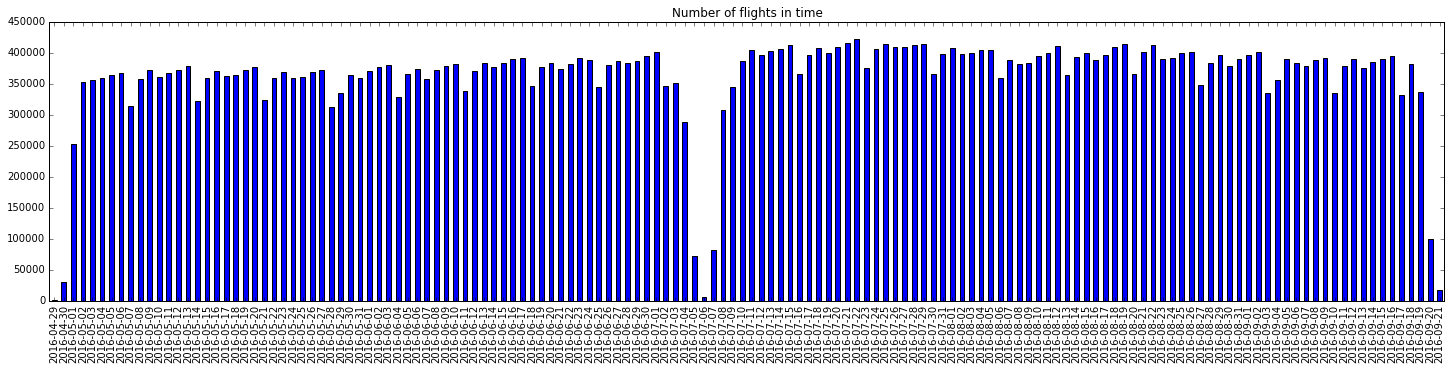

In [51]:
df_departure_date_sorted.plot(kind='bar',figsize =[25,5], title = 'Number of flights in time')


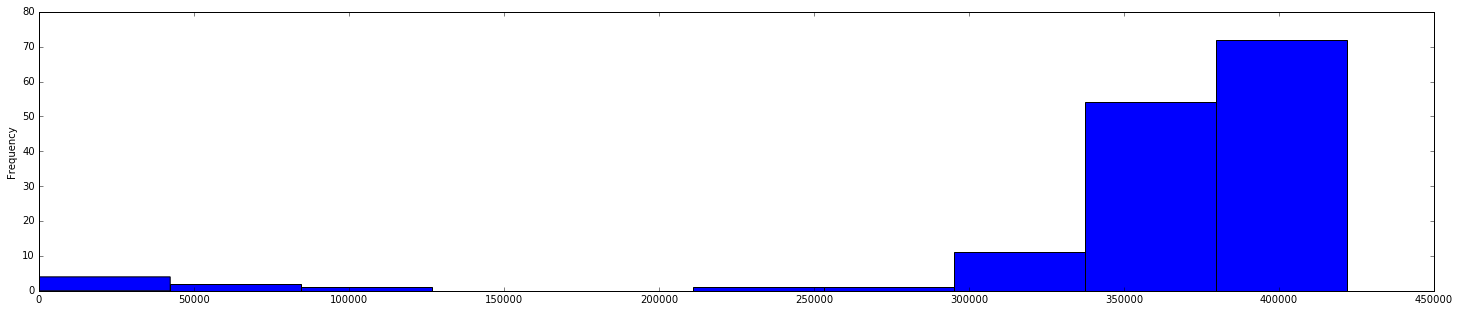